The aim of this project is to gain a deeper understanding of how a hyperspectral pushbroom instrument performs.

Your task is to carefully read and analyze the information given in this folder, then recreate the following aspects of the pre-launch characterization:
In your recreation, you will need to apply mathematical formulas and models to calculate the instrument's performance metrics. 
You will also need to interpret the results and draw conclusions about the instrument's capabilities and limitations.

All referenced papers are included in the [Supporting Material] folder. In your recreation, you will be using an instrument known as HSI V4. 

This assignment aims to develop your skills in scientific research, data analysis, and problem-solving. By recreating the pre-launch characterization of the HYPSO-1 
hyperspectral imager, you will gain a deeper understanding of the challenges involved in designing and testing satellite instruments.

This Notebook is filled with a module to make a mock spectrogram so that you can test various things before going to the lab.


------
Some of the code you need to complete this project is provided as part of this reposiotory.
The code is developed using conda, and we recomend that you do the same.
Here is a step-by-step guide on how to install conda and create the desired environment.

**Installing Conda**

To get started, you'll need to install conda, which is a package manager for Python. You can do this by following these steps:

1. **For Windows**: Download the Anaconda installer from the official Anaconda website: <https://www.anaconda.com/products/individual>. Choose the "Custom" installation option and select only the "conda" component.
2. **For macOS (using Homebrew)**: Run the following command in your terminal: `brew install anaconda`
3. **For Linux**: You can install conda using a package manager like apt-get or yum, or by downloading the installer from the Anaconda website.

**Creating an Environment**

Once you have installed conda, you can create a new environment to isolate your Python packages and dependencies. Here's how:

1. Open a terminal or command prompt.
2. Type `conda create env -f <path-to-"envirnoment.yml">`
3. Activate the environment by typing `conda activate ttk4265`.
4. You should now see `(ttk4265)` at the beginning of your command prompt, indicating that you are working within the newly created environment.
5. The packages you need should be included then
6. To install other packages or dependencies, use the `conda install` command followed by the package name (e.g., `conda install numpy`).
7. When you're finished working in this environment, deactivate it by typing `conda deactivate`.

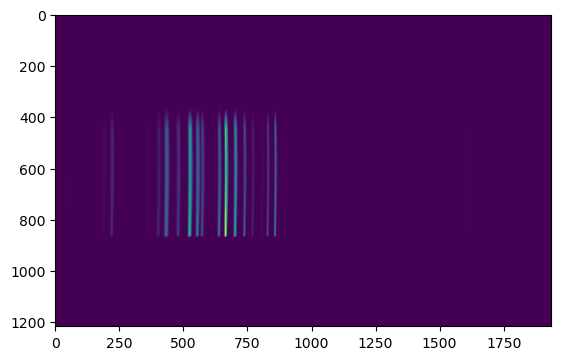

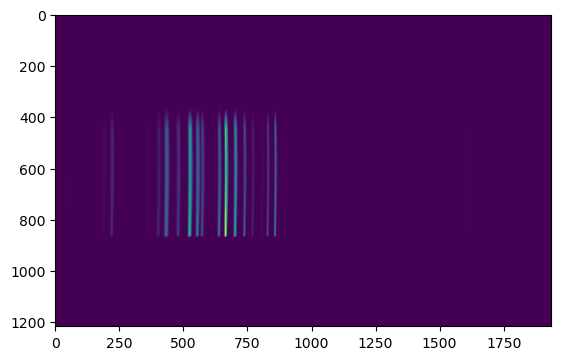

In [38]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Test code to display Hyperspectral images

base_folder = r'C:\Users\ariaa\Documents\!PhD\Optisk Fjernmåling\TTK4265-assignment1-group1-data'
file_name = r'Ar\1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_name = r'Ar\1727163193.770_00002_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name)
file_path3 = os.path.join(base_folder, file_name)

# file_path1 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# file_path3 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163193.770_00002_e999.8941_g008_1936x1216.bip'
        
datacube1 = np.fromfile(file_path1, dtype='uint16')
datacube3 = np.fromfile(file_path3, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,:,::-1]
datacube3 = datacube3.reshape((-1, samples, bands))[:,:,::-1]

plt.imshow(datacube1[:,0,:])
plt.figure()
plt.imshow(datacube3[:,0,:])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

from mock import create_fake_spectrogram
from mock import save_spectrogram_as_png

spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
plt.imshow(spectrogram, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Mock Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

plt.plot(spectrogram[100])
plt.plot(spectrogram[512])
plt.legend(['Line 100', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

filename = os.path.join('Data', 'uniform_mock_spectrogram.png')
save_spectrogram_as_png(spectrogram, filename)

In [ ]:
spectral_lines_list = [
    # index, amplitude, and FWHM
    (100, 0.3, 5),
    (312, 0.6, 3),
    (700, 0.8, 2),
]

spectrogram = create_fake_spectrogram(1024, 1024, 
                                      profile="stripes", 
                                      smile=True, vignetting=False, 
                                      noise=False, 
                                      spectral_lines=spectral_lines_list)

plt.imshow(spectrogram, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Mock Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

plt.plot(spectrogram[100])
plt.plot(spectrogram[512])
plt.legend(['Line 100', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

filename = os.path.join('Data', 'striped_mock_spectrogram.png')
save_spectrogram_as_png(spectrogram, filename)